In [10]:
import pandas as pd

df = pd.read_csv("Netflix_cleaned_dataset.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,tv show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,tv show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
df.shape

(5916, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5916 non-null   object
 1   type          5916 non-null   object
 2   title         5916 non-null   object
 3   director      5915 non-null   object
 4   country       5915 non-null   object
 5   date_added    5915 non-null   object
 6   release_year  5915 non-null   object
 7   rating        5915 non-null   object
 8   duration      5914 non-null   object
 9   listed_in     5914 non-null   object
dtypes: object(10)
memory usage: 462.3+ KB


In [14]:
df.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,5916,5916,5916,5915,5915,5915,5915,5915,5914,5914
unique,5916,3,5914,4286,79,1529,74,15,207,349
top,s1315,movie,22-Jul,Rajiv Chilaka,United States,1/1/2020,2017,TV-MA,1 Season,"Dramas, International Movies"
freq,1,5696,2,20,2400,96,744,2029,171,346


In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1
country,1
date_added,1
release_year,1
rating,1
duration,2
listed_in,2


Text(0.5, 1.0, 'Distribution of Movies vs TV Shows')

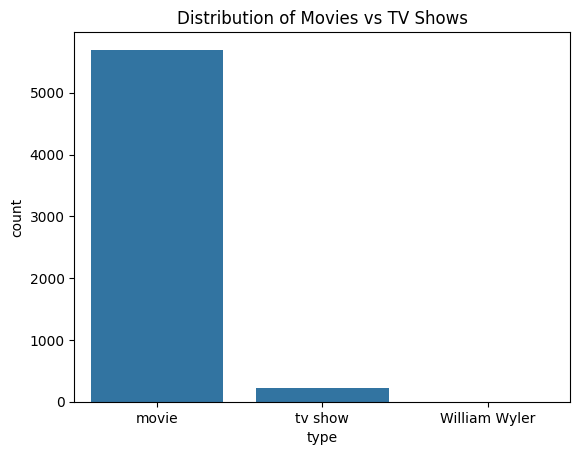

In [24]:
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title("Distribution of Movies vs TV Shows")

Text(0.5, 1.0, 'Content Rating Distribution')

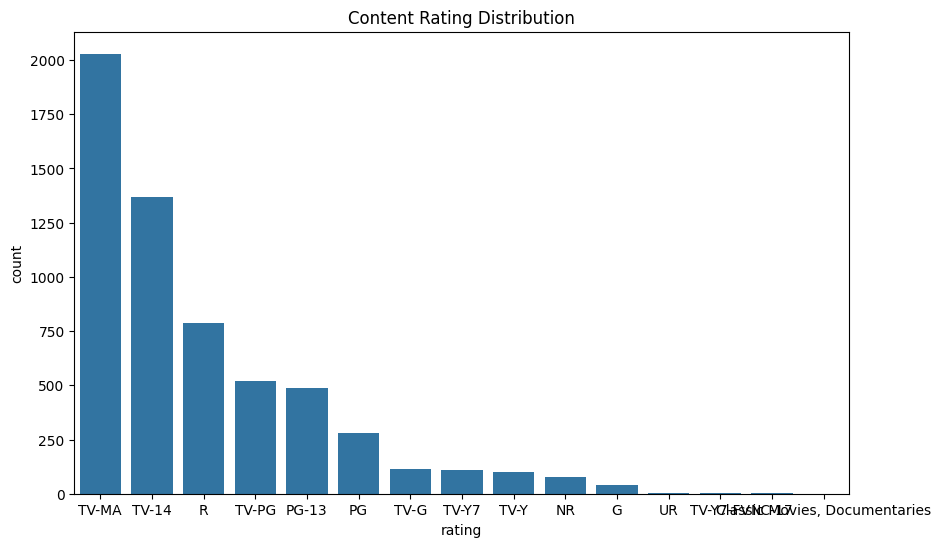

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Content Rating Distribution")


<Axes: title={'center': 'Top 10 Producing Countries'}, xlabel='country'>

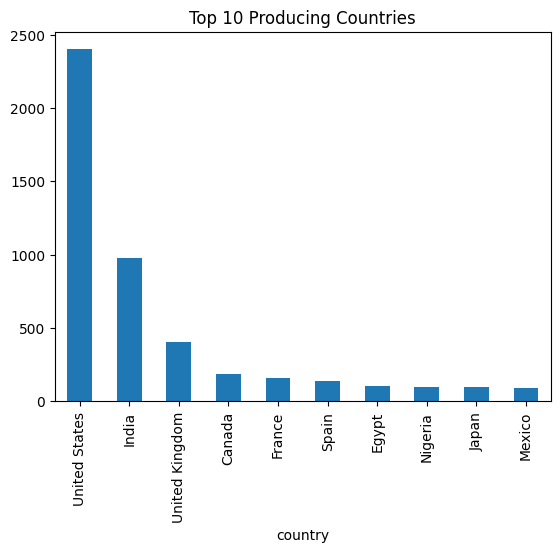

In [28]:
df['country'].value_counts().head(10).plot(kind='bar', title="Top 10 Producing Countries")

<Axes: title={'center': 'Top 10 Genres'}>

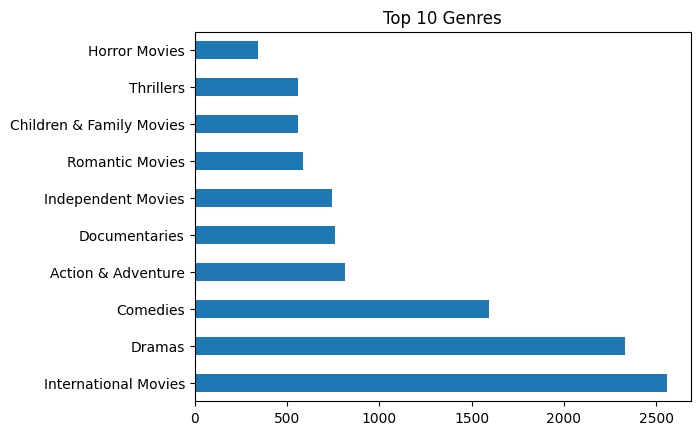

In [8]:
from collections import Counter
import pandas as pd

df = pd.read_csv("Netflix_cleaned_dataset.csv")
genre_list = df['listed_in'].dropna().str.split(', ')
genre_flat = [item for sublist in genre_list for item in sublist]
genre_counts = pd.Series(genre_flat).value_counts()
genre_counts.head(10).plot(kind='barh', title="Top 10 Genres")

In [10]:

df['duration (mins)'] = df['duration'].str.extract('(\d+)').astype(float)

df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['is_kids'] = df['rating'].apply(lambda x: 1 if x in ['TV-Y', 'G', 'PG', 'TV-G'] else 0)


In [23]:
df['date_added'] = df['date_added'].astype(float, errors='ignore')

In [31]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [32]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Score: 0.0038155460555135967


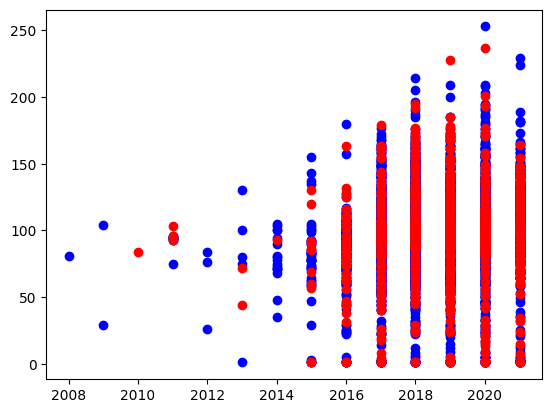

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Drop rows with missing Duration
model_df = df.dropna(subset=['duration (mins)'])

X = model_df[['year_added']]
y = model_df['duration (mins)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Score:", lr.score(X_test, y_test))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.show()


Text(0.5, 1.0, 'Feature Correlation Heatmap')

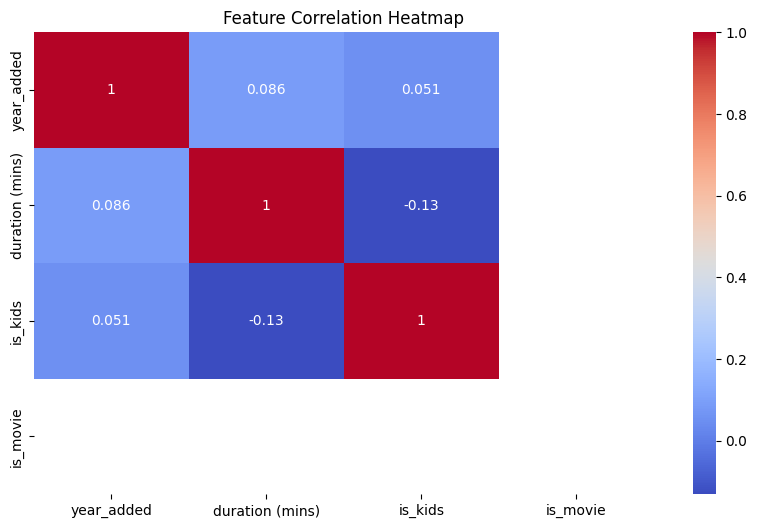

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['year_added', 'duration (mins)', 'is_kids', 'is_movie']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")


<Axes: title={'center': 'Content Added Over Time'}, xlabel='year_added'>

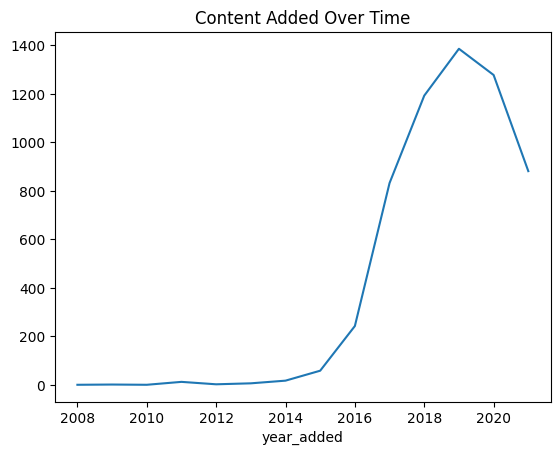

In [42]:
year_counts = df['year_added'].value_counts().sort_index()
year_counts.plot(kind='line', title='Content Added Over Time')
